# Reading CGMF Fission Events

In [1]:
### initializations and import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
%pylab inline

from CGMFtk import histories as fh

Populating the interactive namespace from numpy and matplotlib


In [2]:
### rcParams are the default parameters for matplotlib
import matplotlib as mpl

print ("Matplotbib Version: ", mpl.__version__)

mpl.rcParams['font.size'] = 18
mpl.rcParams['font.family'] = 'Helvetica', 'serif'
#mpl.rcParams['font.color'] = 'darkred'
mpl.rcParams['font.weight'] = 'normal'

mpl.rcParams['axes.labelsize'] = 18.
mpl.rcParams['xtick.labelsize'] = 18.
mpl.rcParams['ytick.labelsize'] = 18.
mpl.rcParams['lines.linewidth'] = 2.

font = {'family' : 'serif',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 18,
        }

mpl.rcParams['xtick.major.pad']='10'
mpl.rcParams['ytick.major.pad']='10'

mpl.rcParams['image.cmap'] = 'inferno'

Matplotbib Version:  3.1.3


The default output of a CGMF run is an ASCII file that contains characteristics of fission events. Once the **Histories** python class is uploaded, reading a CGMF output is straightforward:

In [3]:
hist = fh.Histories ('98252sf.cgmf')

The number of fission events and fission fragments can be easily extracted from the **Histories** class

In [4]:
print ('This file contains ',str(hist.getNumberEvents()),' events and ',str(hist.getNumberFragments()),' fission fragments')

This file contains  500000  events and  1000000  fission fragments


With the option 'nevents', the number of fission events that are read can be specified:
    
hist = fh.Histories('92235_1MeV.cgmf',nevents=5000)

This can be particularly useful for testing routines on a small number of events since reading the full history file could be time consuming

Several python functions, part of the **Histories** class, make it easy to analyze those events. 

### Accessing Fission Histories

Although we rarely need to access directly the fission histories, it is possible by typing:

In [5]:
events = hist.getFissionHistories()

In [6]:
events[10]

array([115, 45, 17.218, 11.5, -1, 109.292, 2, 7, list([1.099, 1.435]),
       list([1.419, 4.427]),
       list([0.849, 0.848, 0.196, 0.071, 0.63, 0.231, 0.211]),
       list([0.849, 0.848, 0.196, 0.071, 0.63, 0.231, 0.211]),
       list([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]), 1036.646, -4397.075,
       -1729.17, 987.958, -4304.322, -1671.193,
       list([array([ 0.132,  0.663, -0.737]), array([ 0.473, -0.875,  0.107])]),
       list([array([ 0.292, -0.164, -0.942]), array([ 0.368, -0.924, -0.102])]),
       0, list([]), list([]), 104.141], dtype=object)

This history first list the characteristics of the fission fragment in mass, charge, excitation energy, spin, parity, and kinetic energy. It then provides the number of neutrons and gamma rays emitted in this event, followed by their characteristics in energy and direction.

### Accessing Fission Fragment Characteristics

Fission fragment characteristics can be obtained using accessors such as: getA(), getZ(), getNu(), etc.

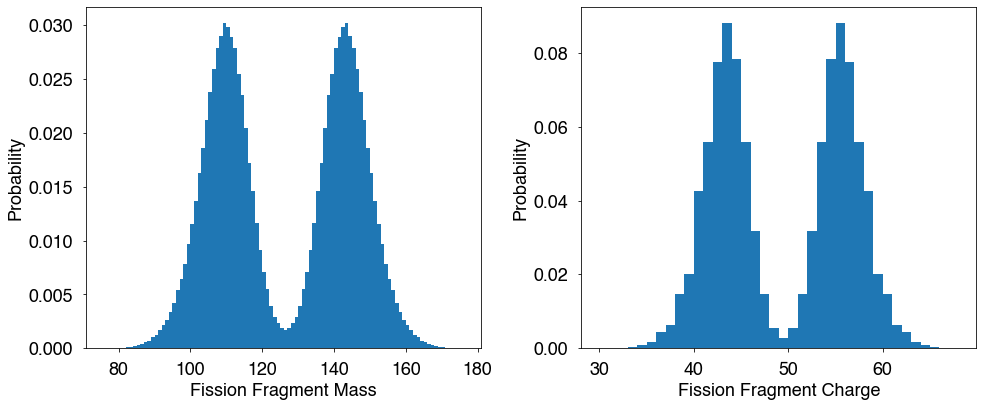

In [8]:
A = hist.getA()
Z = hist.getZ()

fig=figure(figsize(14,6))
plt.subplot(1,2,1)
plt.hist(A,bins=np.arange(min(A),max(A)+1),density=True)
plt.xlabel("Fission Fragment Mass")
plt.ylabel("Probability")

plt.subplot(1,2,2)
plt.hist(Z,bins=np.arange(min(Z),max(Z)+1),density=True)
plt.xlabel("Fission Fragment Charge")
plt.ylabel("Probability")

plt.tight_layout()
plt.show()

Quantities for the light and heavy fragments can be extracted

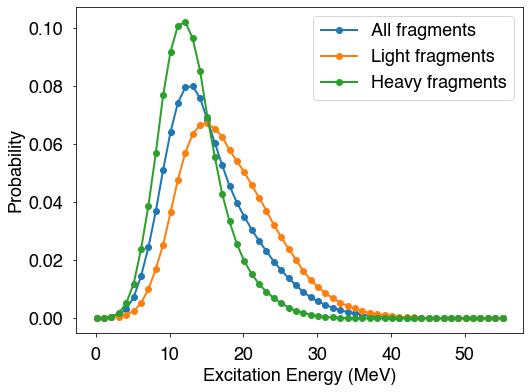

In [15]:
U = hist.getU()
Ul = hist.getULF()
Uh = hist.getUHF()
bx = np.arange(min(U),max(U)+1)

h,b = np.histogram(U,bins=bx,density=True)
hl,bl = np.histogram(Ul,bins=bx,density=True)
hh,bh = np.histogram(Uh,bins=bx,density=True)

fig = plt.figure(figsize=(8,6))
plt.plot(b[:-1],h,'o-',label='All fragments')
plt.plot(bl[:-1],hl,'o-',label='Light fragments')
plt.plot(bh[:-1],hh,'o-',label='Heavy fragments')
plt.legend()
plt.xlabel('Excitation Energy (MeV)')
plt.ylabel('Probability')
plt.show()

Plotting the initial excitation energy of the fragments as a function of its kinetic energy can be done by invoking getU() and getKEpre() (before neutron emission).

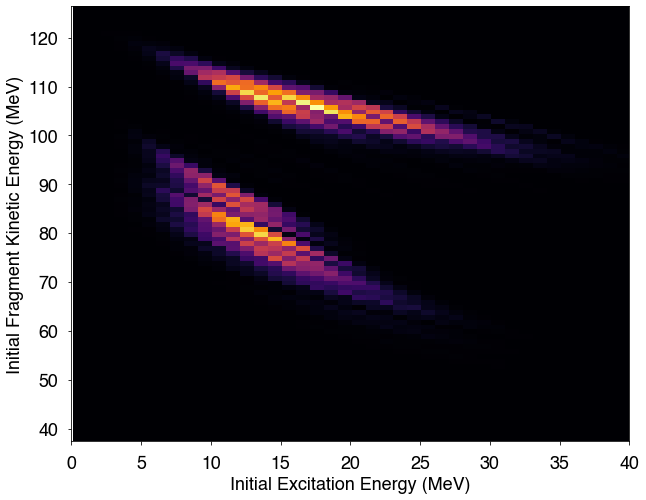

In [12]:
U=hist.getU()
KE=hist.getKEpre()
bx=np.arange(min(U),max(U))
by=np.arange(min(KE),max(KE))

fig=figure(figsize(10,8))
plt.hist2d(U,KE,bins=(bx,by))
plt.xlim(0,40)
plt.xlabel("Initial Excitation Energy (MeV)")
plt.ylabel("Initial Fragment Kinetic Energy (MeV)")
plt.show()

### Summary table

A table summarizing the main characteristics of all fission events, fission fragments, neutrons and gamma rays can be generated by using the **summaryTable()** function.

In [13]:
hist.summaryTable()

[['',
  'All Fragments',
  'Light Fragments',
  'Heavy Fragments',
  'Pre-Fission',
  'Total'],
 ['A', '126.00', '108.61', '143.39'],
 ['Z', '49.00', '42.63', '55.37'],
 ['TXE / U (MeV)', '32.05', '18.51', '13.54'],
 ['TKE / KE (MeV)', '185.78', '105.57', '80.21'],
 ['J ($\\hbar$)', ' 9.35', ' 8.87', ' 9.84'],
 ['parity', ' 0.00', ' 0.00', ' 0.00'],
 ['$\\langle \\nu\\rangle$', '3.818', '2.136', '1.681', '0.000', '3.818'],
 ['$\\langle \\epsilon_n^{cm}\\rangle$ (MeV)', '1.303', '1.372', '1.214'],
 ['$\\langle E_n^{lab}\\rangle$ (MeV)',
  '2.077',
  '2.329',
  '1.757',
  '0.000',
  '2.077'],
 ['$\\langle \\nu_\\gamma\\rangle$', ' 8.32', ' 4.29', ' 4.03'],
 ['$\\langle E_\\gamma^{lab}\\rangle$ (MeV)', ' 0.75', ' 0.76', ' 0.75']]